----
----

##**<center>PROYECTO FINAL: GOOGLE & YELP<center>**

-----
-----

## **Mediante el presente Notebook se realizará un análisis exploratorio (EDA) de los datos obtenidos de la plataforma Yelp.**
----

In [ ]:
# Importar librerias
from google.colab import drive
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Establece conexión con google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Guarda las rutas de los data sets  en variables
ruta1='/content/drive/MyDrive/Proyecto Final/Yelp/business.pkl'
ruta2='/content/drive/MyDrive/Proyecto Final/Yelp/checkin.json'
ruta3='/content/drive/MyDrive/Proyecto Final/Yelp/review.json'
ruta4='/content/drive/MyDrive/Proyecto Final/Yelp/tip.json'
ruta5='/content/drive/MyDrive/Proyecto Final/Yelp/user.parquet'


### *Lectura de datos del archivo "business"*
---

In [ ]:
# Lee archivo "business"
print('Dataset "business" de la plataforma Yelp:\n')
business=pd.read_pickle(ruta1)
parte_nula=business.iloc[:,14:].tail()
parte_nula.dropna(how='all')
business=business.iloc[:,:14]
business
# OBSERVACIONES GENERALES
  # La tabla contiene columnas duplicadas, dichas columnas estan todas vacias
  # La tabla contiene columnas duplicadas, dichas columnas estan todas vacias
  # Sin registros duplicados
  # Campos con valores nulos-->  "attribut"--13744 / "categories"--103 / "hours"-- 23223
  # Columnas candidatas a ser eliminadas--> "is_open" - no aporta información reelevantes para nuestro analisis
  #  # Tipo incorrecto: "latitude" - "Longitude" - "stars" - "review_count"


Dataset "business" de la plataforma Yelp:



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


Se observa que el dataset "business" contiene 150.346 registros y 14 dimensiones, en el mismo se observan datos acerca de negocios de distintos rubros dentor de Estados Unidos, proporcionando datos como id del negocio, ubicación del mismo y categoria o rubro al que pertenece entre otros datos.

In [ ]:
print('Metadatos:\n')
# Muestra información general de los datos
business.info()


Metadatos:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


Se puede observar que las columna "latitude", "longitude" , "stars" , "review_count" figuran como variables de tipo "object" lo cual es incorrecto ya que son variables cuantitativas, se procederá a cambiar las mencionadas variables a tipo "int" o "float" según corresponda en el proceso de ETL.

In [ ]:
# Muestra Valores duplicados
print('Duplicados:')
duplicados=business.drop(columns=['attributes','hours']).duplicated().sum()
if duplicados==True:
  print(duplicados)
else:
    print('No se encontraron registros duplicados\n')

# Ver si la columna "business_id" contiene duplicados
print('Registros Duplicados en la columna "busines_id":')
business[business.duplicated(subset='business_id')]
# OBS
  # Columnas "attributes" y "hours" contienen diccionarios los cuales son objetos no hasheables, lo que limita usar funciones como duplicated para ver duplicados, pasar a string con funcion lambda para aplicar duplicated (resuelto en la liean de codigo de abajo)



Duplicados:
No se encontraron registros duplicados

Registros Duplicados en la columna "busines_id":


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


Se observa que los datos no contienen registros duplicados

In [ ]:
# Revisa valores Nulos
print('Valores Nulos:\n')
business.isnull().sum()

Valores Nulos:



business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

Se observa que la la columna "attributes" contiene 13.744 valores nulos , la columna "categories" contiene 103 valores nulos y la columna "hours" 23.223 valores nulos.
Para evitar la perdida de registros dichos nulos se trataran de la siguiente manera:
- Los nulos de la columna "attributes" por ser una variables cualitativa serán reeemplazados por la etiqueta "sin atributos"
- Los valores nulos de las columna "categories" serán eliminados ya que su cantidad es insignificante en relación a la totalidad de los datos

In [ ]:
# Estados de los que dispongo datos
estados=business['state'].dropna()
cantidad_estados=estados.nunique()

print(f'Se encontraron datos de {cantidad_estados} estados')
for i in estados.unique():
  print(i)


Se encontraron datos de 27 estados
CA
MO
AZ
PA
TN
FL
IN
LA
AB
NV
ID
DE
IL
NJ
NC
CO
WA
HI
UT
TX
MT
MI
SD
XMS
MA
VI
VT


Se observa que el dataset "business" contiene datos de negocios distrbuidos a lo largo de 27 estados de los 50 estados de Estados Unidos.

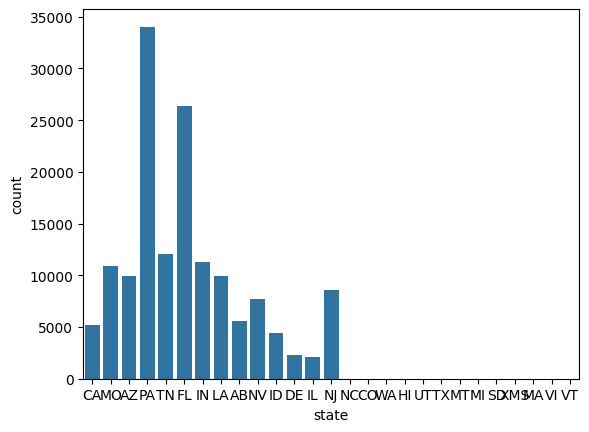

In [ ]:
# Muestra la Cantidad de Negocios por estado
  # Poner nombre a ejes
  # Poner titulo a grafico
  # hacer mas grande la figura
  # Ordenar por cantidad
sns.countplot(x=business['state'])
plt.show()


Se encontraron datos de 150343 negocios

El top 10 estados con mas negocios contiene 136243 negocios

Los 5 estados con mas negocios contienen el 90.62 % de la totalidad de negocios



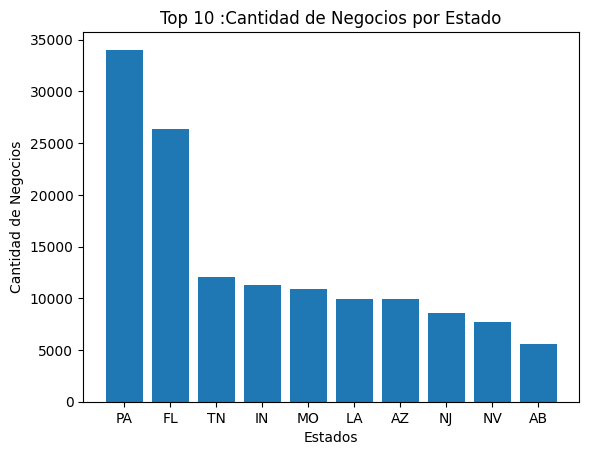

In [ ]:
# Cantidad de negocios por estado
estados=business.groupby(by='state').size().reset_index()
estados=estados.rename(columns={0:'Cantidad_negocios'})
cantidad_negocios=estados['Cantidad_negocios'].sum()
print(f'Se encontraron datos de {cantidad_negocios} negocios\n')

# Top 10 estados con mas negocios
top10=estados.sort_values(by='Cantidad_negocios',ascending=False).iloc[0:10,:].reset_index(drop=True)
cantidad_negocios_top10=top10['Cantidad_negocios'].sum()
print(f'El top 10 estados con mas negocios contiene {cantidad_negocios_top10} negocios\n')

# Porcentaje de negocios del top5
porcentaje=round((cantidad_negocios_top10/cantidad_negocios)*100,2)
print(f'Los 5 estados con mas negocios contienen el {porcentaje} % de la totalidad de negocios\n')

# Grafica el top 10 estados con mas negocios
plt.bar(top10['state'],top10['Cantidad_negocios'])
plt.xlabel('Estados')
plt.ylabel('Cantidad de Negocios')
plt.title('Top 10 :Cantidad de Negocios por Estado')
plt.show()



# En comun con los datos de yelp
  # PA, FL , CA , IL

Se observa que el dataset "busines" proporciona datos de 150.343 negocios ubicados alrededor de 27 estados, se observa tambien que los 10 estados (Pensilvania, Florida, Tennessee, Indiana, Misuri,Luisiana,Arizona,Nueva Jersey, Nueva York) con mas negocios contienen 136.243 negocios, lo cual corresponde al 62.91 % de la totalidad de negocios de los que se tienen datos.

In [ ]:
# Filtrado Categoria "Gastronimica en general"
# Dado que los datos poseen multiples categorias de negocios decidimos explorar el rubro gastronomico

In [ ]:
# Observar del estado de pensilvania que negocios tienen mayor clasificación

In [ ]:
# Cruzar con los datos de google "Metadata_sitios"

### Explorar columna "review_count"
---

Valor maximo 7568, valor minimo 5

Estadisticas de la variable "review_count"

count    150346.000000
mean         44.866561
std         121.120136
min           5.000000
25%           8.000000
50%          15.000000
75%          37.000000
max        7568.000000
Name: review_count, dtype: float64

Grafico de caja para detección de outliers


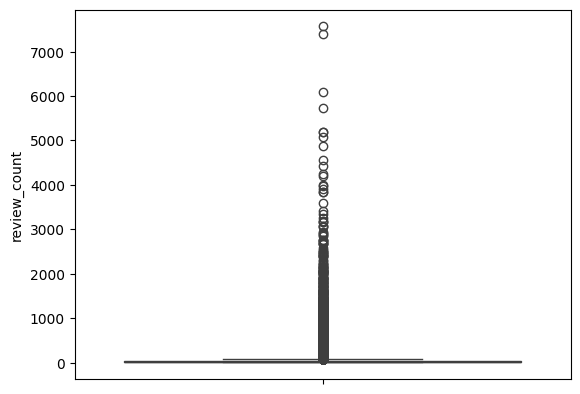

In [ ]:
# Maximo y minimo
maximo=business['review_count'].max()
minimo=business['review_count'].min()
# Cambia la variable review_count a tipo entero
business['review_count']=business['review_count'].astype(int)
estadisticas=business['review_count'].describe()

# Display en pantalla
print(f'Valor maximo {maximo}, valor minimo {minimo}\n')
print(f'Estadisticas de la variable "review_count"\n')
print(estadisticas)
print('\nGrafico de caja para detección de outliers')
# Observar Outliers
sns.boxplot(business['review_count'])
plt.show()

Se observa que la variable "review_count" contiene valores atipicos, dichos valores indican la cantidad de reseñas que posee un negocio, teniendo un rango que varia de 5 a 7568 reseñas, a nuestro criterio los valores altos de reseñas son valores que perfectamente pueden encajar con un negocio con gran presencia en internet por lo cual no son valores descarados.

### Explorar columna "categories" en profundidad
---


In [ ]:
categorias=business['categories']
categorias.dropna(inplace=True)
cat=pd.DataFrame(categorias.str.split(',').tolist())
cat


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,Doctors,Traditional Chinese Medicine,Naturopathic/Holistic,Acupuncture,Health & Medical,Nutritionists,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Shipping Centers,Local Services,Notaries,Mailbox Centers,Printing Services,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Department Stores,Shopping,Fashion,Home & Garden,Electronics,Furniture Stores,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Restaurants,Food,Bubble Tea,Coffee & Tea,Bakeries,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Brewpubs,Breweries,Food,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150238,Nail Salons,Beauty & Spas,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
150239,Pets,Nurseries & Gardening,Pet Stores,Hobby Shops,Bird Shops,Home & Garden,Shopping,None,None,None,...,None,None,None,None,None,None,None,None,None,None
150240,Shopping,Jewelry,Piercing,Toy Stores,Beauty & Spas,Accessories,Fashion,None,None,None,...,None,None,None,None,None,None,None,None,None,None
150241,Fitness/Exercise Equipment,Eyewear & Opticians,Shopping,Sporting Goods,Bikes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### *Lectura del archivo "chekin"*
---

In [ ]:
# Lee archivo "checkin"
checkin=pd.read_json(ruta2,lines=True)
checkin
# OBSERVACIONES GENERALES
  # Sin registros duplicados
  # Sin datos nulos


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [ ]:
# Transforma los datos de la columna "date" en una lista de fechas
checkin['date']=checkin['date'].str.split(',')
# Expandir datos
checkin=checkin.explode('date').reset_index(drop=True)
checkin

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33
...,...,...
13356870,zzu6_r3DxBJuXcjnOYVdTw,2013-12-11 00:52:49
13356871,zzu6_r3DxBJuXcjnOYVdTw,2013-12-13 00:58:14
13356872,zzw66H6hVjXQEt0Js3Mo4A,2016-12-03 23:33:26
13356873,zzw66H6hVjXQEt0Js3Mo4A,2018-12-02 19:08:45


El dataset "checkin" proporciona datos acerca de la concurrencia de clientes que tiene cada uno de los negocios, mostrando la fecha y hora en la que los clientes ingresan a cada negocio.

In [ ]:
# Revisar valores nulos y registros duplicados
# valores nulos
print('Valres nulos:\n')
checkin.isnull().sum()
# Registros duplicados
print('Registros duplicados:\n')
checkin[checkin.duplicated()]


Valres nulos:

Registros duplicados:



,business_id,date
4345,-0TffRSXXIlBYVbb5AwfTg,2015-02-22 19:25:58
5483,-0Ym1Wg3bXd_TDz8JtvOQg,2018-11-25 21:25:27
8805,-1B9pP_CrRBJYPICE5WbRA,2015-04-24 22:18:54
9316,-1B9pP_CrRBJYPICE5WbRA,2016-02-19 00:49:11
14156,-2YZIUArmrIMVVBi8CT47w,2017-03-12 01:19:31
...,...,...
13317043,znlrxrY4InSx7ekPZxoHRw,2015-08-30 22:33:33
13320496,znrgu7fSTbFa9LVm__CV7A,2011-06-12 04:57:59
13338680,zuDhc0Em-h_o4erj4OatVw,2014-11-16 19:04:06
13341322,zun6IVJa7wYe3wAPqWnPGw,2017-11-09 20:25:31


Se observa que los datos no contienen valres nulos, respecto a los registros duplicados se encontraron 3519 registros duplicados, los mismos no serán eliminados del conjunto de datos ya que a nuestro criterio existe la posibilidad de que 2 o mas clientes ingresen en el restaurante exactamente a la misma hora

In [ ]:
# Datos generales del dataset
print('Metadatos:\n')
checkin.info()

Metadatos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


### *Lectura del archivo "review"*
---

In [ ]:
# Leer archivo "review"
review=pd.read_json(ruta3,lines=True,nrows=50000) # la lectura del archivo completo implica el uso de RAM excesiva, por lo tanto se lee una muestra de 50 k filas
review
# OBSERVACIOESN GENERALES
  # Sin registros duplicados
  # Sin valores nulos


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
49995,V_bNx4GEH8ChNNA0GPMrOA,_-x9v81zddshIEwRirV7kQ,GBTPC53ZrG1ZBY3DT8Mbcw,4,0,0,0,Came here first for breakfast and had their yu...,2016-10-29 00:54:49
49996,5beIdB00qToFzllb4alZNQ,VEOTasfs8zYs7grZ4C5Xfw,EQ-TZ2eeD_E0BHuvoaeG5Q,2,0,0,0,Food was good. I had a decent breakfast but no...,2017-08-09 13:12:33
49997,rjFWnq1zQTRzCyqV0jzZHw,AT_p7NkLqd50ugp3wjFg2Q,_RFqyBgklIBqOAM-zzV_WQ,3,0,1,0,It's cool that Second Image is trying. They so...,2010-07-11 21:41:35
49998,8LRFPHiso_kuCseg5BJx8A,NSCNU_j0vSdeRMIme3H0rg,8agPzX-O-8LEDjDNloSdzQ,4,1,0,1,"Best shrimp on the beach! Steamed to order, d...",2017-04-09 23:23:56


El dataset "review" de la plataforma Yelp brinda datos de reseñas realizadas por los usuarios en los distintos negocios, proporcionando datos tales como fecha de la reseña, id del usuario dentro de la platafroma, id de la reseña, además posee colummas tales como "useful" donde se indica si la reseña es útil o no , coumna "funny" donde se indica si la reseña es divertida o no, la columna "cool" indica si el comentario es agradable o no.

Análisis del DataFrame:

Tipos de datos:
review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

Valores faltantes y nulos:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Duplicados:
0

Metadatos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    50000 non-null  object        
 1   user_id      50000 non-null  object        
 2   business_id  50000 non-null  object        
 3   stars        50000 non-null  int64         
 4   useful       50000 non-null  int64         
 5 

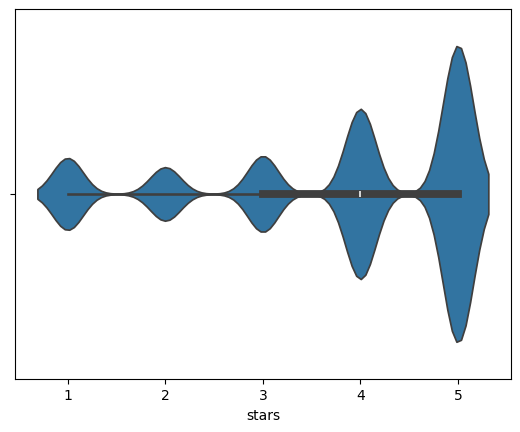


Distribución:


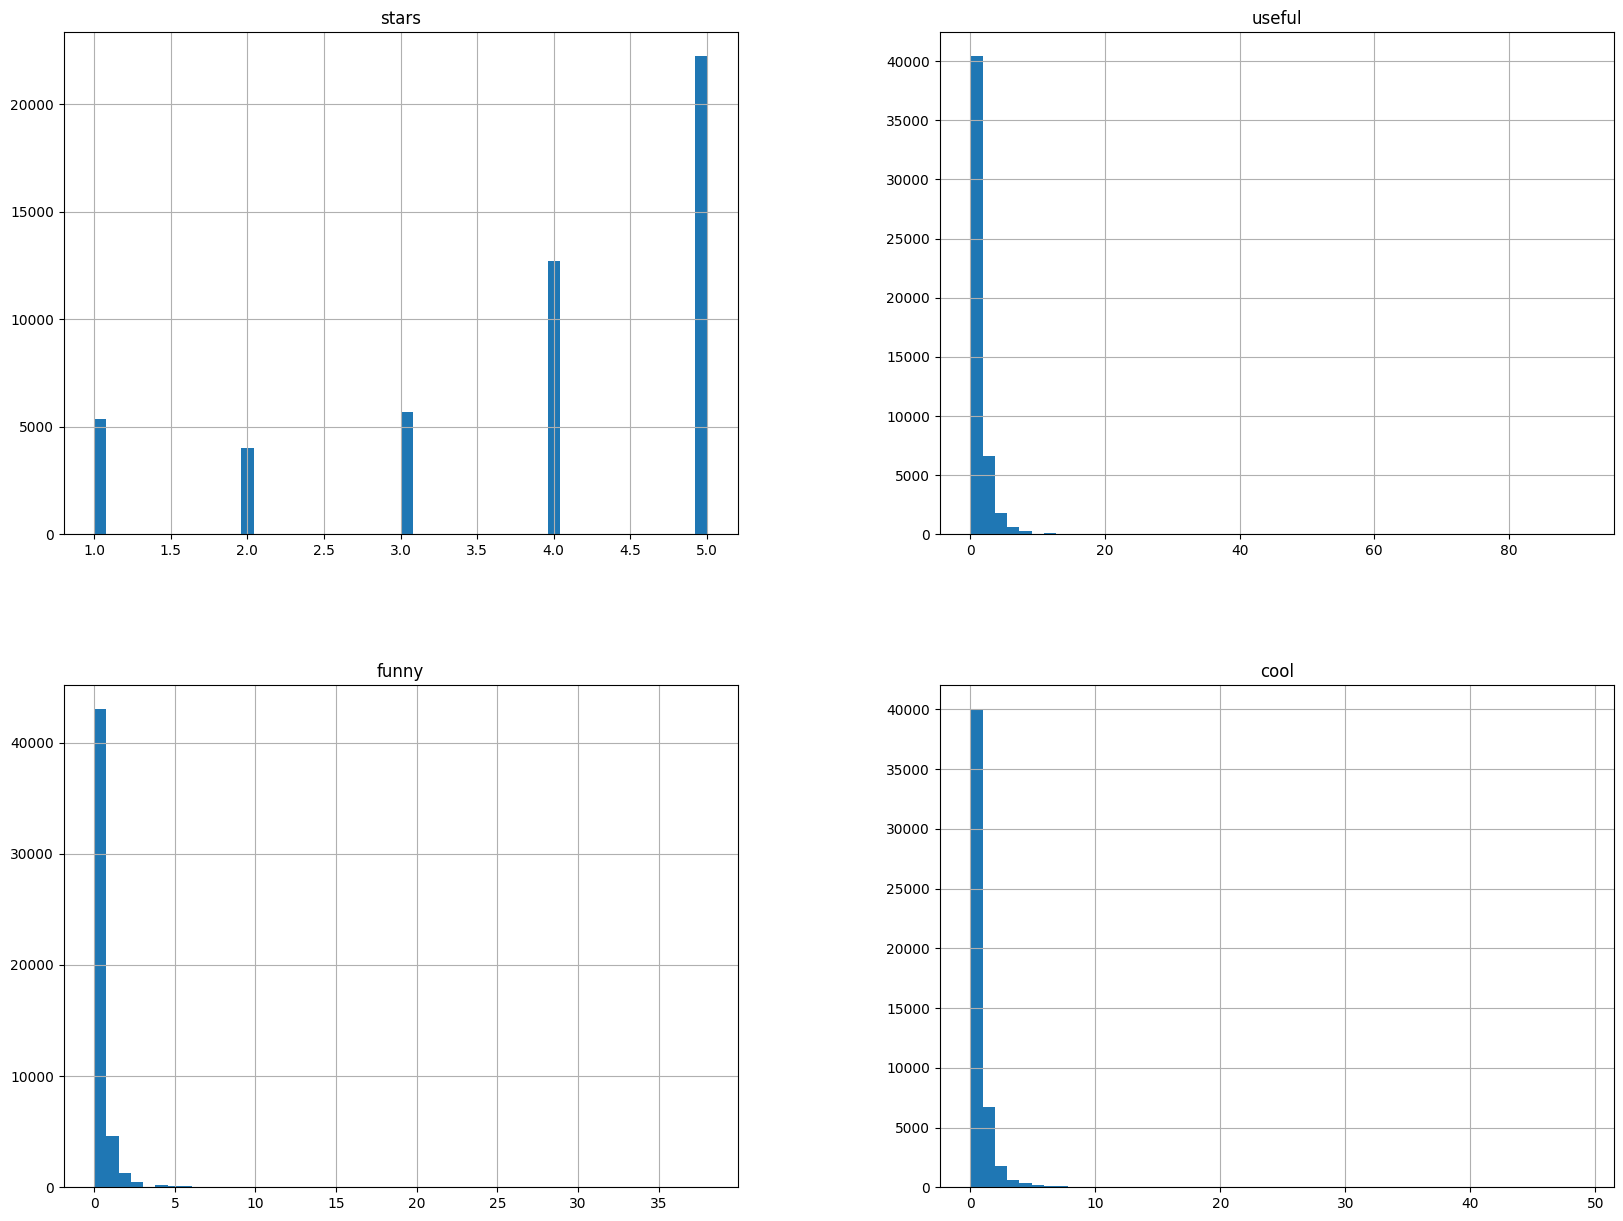


Descripción de los datos:
                     review_id                 user_id  \
count                    50000                   50000   
unique                   50000                   42936   
top     KU_O5udG6zpxOg-VcAEodg  _BcWyKQL16ndpBdggh2kNA   
freq                         1                      25   
first                      NaN                     NaN   
last                       NaN                     NaN   
mean                       NaN                     NaN   
std                        NaN                     NaN   
min                        NaN                     NaN   
25%                        NaN                     NaN   
50%                        NaN                     NaN   
75%                        NaN                     NaN   
max                        NaN                     NaN   

                   business_id         stars        useful         funny  \
count                    50000  50000.000000  50000.000000  50000.000000   
unique  

<ipython-input-49-c558fdfb8caa>:34: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df2.describe(include='all'))


In [ ]:
# Reemplaza 'df2' con el nombre de tu DataFrame
df2 = review

print("Análisis del DataFrame:")

# Tipos de datos
print("\nTipos de datos:")
print(df2.dtypes)

# Valores faltantes y nulos
print("\nValores faltantes y nulos:")
print(df2.isnull().sum())


# Duplicados
print("\nDuplicados:")
print(df2.duplicated().sum())

# Metadatos
print("\nMetadatos:")
print(df2.info())

# Gráfico de violín para la columna 'rating'
sns.violinplot(x=df2['stars'])
plt.show()

# Distribución - utilizando histogramas para variables numéricas
print("\nDistribución:")
df2.select_dtypes(include=['int64', 'float64']).hist(bins=50, figsize=(20,15))
plt.show()

# Descripción de los datos
print("\nDescripción de los datos:")
print(df2.describe(include='all'))

print("\n" + "="*50 + "\n")

Se observa que los datos no contienen registros duplicados, tampoco se encontraron valores nulos.
Para complemento del análisis se efecturaon graficos para visualizar como se distribuye la variable "stars", se puede ver que predominan las 5 estrellas, por otra parte la variable "useful" se observa que la gran mayoria de las reseñas tienen utilidad además son divertidas y son "buena onda"

In [ ]:
# Años de reseñas
año_inicial=review['date'].dt.year.min()
año_final=review['date'].dt.year.max()
print(f'Año inicial {año_inicial} - Año final {año_final}')

Año inicial 2005 - Año final 2018


Los datos muestran reseñas realizadas desde el año 2005 hasta el año 2018

### *Lectura del archivo "tip"*
---

In [ ]:
# Leer archivo "tip"
tip=pd.read_json(ruta4,lines=True)
print('Dataset "tip"\n')
tip

Dataset "tip"



,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


In [ ]:
# Información general
print('Información general de los datos:\n')
tip.info()

Información general de los datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


Los datos contienen información de opiniones utiles acerca del negocio en cuestión, este dataset contiene información del usuario que efectuó la reseña, el negocio al cual hace mención, la fecha de publicación de dicha reseñea y la cantidad de cumplidos que recibió el comentarió a modo de confirmación de la opinión.

In [ ]:
# Ver valores duplicados
print('Registros duplicados:\n')
tip[tip.duplicated()]

Registros duplicados:



,user_id,business_id,text,date,compliment_count
29901,00Cz_vdInMHpTRjqbWjK5Q,ncacMQ9n_dSM1cR3c1vTQw,Miss saigon,2010-12-07 01:59:12,0
58887,47zMh_WgunwRDf7Cx2WyYw,J8vz_zwZaxzA585lV_k_vA,Com chien and mi are delish!,2011-07-23 17:22:58,0
99407,WQ8shYm0ghNDz97BuHI1fA,Sv1MEZP-mMfp8SmE0hwYEA,love the crispy buns!,2017-10-18 23:29:03,0
126358,hGxVvXVg7IK4J2aTiGMSIQ,5RsVAkDnMrcSbErS6P1eew,"Pricey, often crowded, and staff are not alway...",2017-10-20 22:08:25,0
129213,1gDoko0TrN0lnQlMC2JtXw,06PmqoU3uY5Vb-BEaMPVfw,"We ordered a pizza on New Year's Day, it never...",2014-02-20 04:09:37,0
...,...,...,...,...,...
793788,nnWFrvhO2jeq0KbG_CKCYA,jmG_QxXXfz2cnw9dQCXJLQ,"Great place, great baked goods!",2019-06-08 17:06:50,0
794036,ajDPsSD77sxcVttPfftBRQ,DTxB12bQaZ1m-nLeXWX2rw,Good service and delicious food,2017-09-12 23:01:50,0
820290,wYo3aBVj-bRPT7E4RSj5Kg,W5SNps2JaT_RozLAl_TN1Q,Worker there are the best at serving me quick ...,2017-12-17 01:10:52,0
873070,TEjijSowDwJM4vCL-zn4ew,YPHDzg1h-PkaxfoppT-iJg,bleed blue,2011-09-26 00:03:49,0


In [ ]:
# Ver valores nulos
print('Valores nulos:\n')
tip.isnull().sum()

Valores nulos:



user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

Se obseva que los datos contienen 67 registros duplicados, los cuales no son reelevantes dado que aportan información redundante, respecto a los valores nulos el dataset no contiene valores nulos

### *Lectura del archivo "user"*
---

In [ ]:
# Leer archivo "user"
user=pd.read_parquet(ruta5)
print('Dataset "user"\n')
user
# OBS GENERALES
  #117 k registros duplicados, deben ser eliminados
  # Sin valores nulos
  # columnas candidatas a ser eliminadas--> "elite" (no aporta datos significativos a nuestro criterio)


Dataset "user"



,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Revisar nulos
user.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

Se observa que el conjunto de datos no contiene registros con valores nulos

In [ ]:
# Informacion general
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


Se observa que la columna "yelping_since" es de tipo incorrecto ya que figura como tipo object, siendo una dimensión que contiene datos de fechas.

In [ ]:
# Ver duplicados
user[user.duplicated()]

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1987897,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1987898,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
1987899,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
1987900,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
1987901,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
user[user.duplicated(subset='user_id')]
# OBS: 117 k registros duplicados, deben ser eliminados

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1987897,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1987898,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
1987899,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
1987900,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
1987901,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
user=user.drop_duplicates().reset_index(drop=True)
user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


Se observan 117.700 registros duplicados, los mismos serán eliminados del conjunto de datos para evitar redundancias en analisis posteriores

In [ ]:
# Ver correlacion entre variables
correlaciones= user.corr()
correlaciones

<ipython-input-10-dc32fbc46a25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones= user.corr()


,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
review_count,1.000000,0.573369,0.476440,0.494112,0.534190,0.045380,0.262447,0.189265,0.135110,0.120866,0.083666,0.209687,0.267455,0.301840,0.301840,0.333263,0.150500
useful,0.573369,1.000000,0.954307,0.991841,0.643238,0.010973,0.614303,0.426293,0.360189,0.262687,0.203699,0.433614,0.663199,0.735886,0.735886,0.700046,0.546947
funny,0.476440,0.954307,1.000000,0.964872,0.590613,0.007060,0.661326,0.476574,0.409498,0.303063,0.235382,0.441846,0.673973,0.772529,0.772529,0.757250,0.581671
cool,0.494112,0.991841,0.964872,1.000000,0.600828,0.010437,0.630804,0.436831,0.373656,0.270682,0.210513,0.436336,0.671736,0.754928,0.754928,0.707368,0.574912
fans,0.534190,0.643238,0.590613,0.600828,1.000000,0.019413,0.425691,0.257129,0.204807,0.199979,0.121405,0.321864,0.526995,0.484914,0.484914,0.459413,0.296039
average_stars,0.045380,0.010973,0.007060,0.010437,0.019413,1.000000,0.005928,0.004485,0.002745,0.002601,0.001425,0.004902,0.006592,0.007309,0.007309,0.007370,0.003890
compliment_hot,0.262447,0.614303,0.661326,0.630804,0.425691,0.005928,1.000000,0.627411,0.609600,0.546024,0.434293,0.721171,0.682982,0.882702,0.882702,0.802483,0.721363
compliment_more,0.189265,0.426293,0.476574,0.436831,0.257129,0.004485,0.627411,1.000000,0.961363,0.919417,0.931902,0.448723,0.563017,0.666685,0.666685,0.803428,0.825297
compliment_profile,0.135110,0.360189,0.409498,0.373656,0.204807,0.002745,0.609600,0.961363,1.000000,0.890371,0.908688,0.421115,0.558923,0.639783,0.639783,0.774470,0.785596
compliment_cute,0.120866,0.262687,0.303063,0.270682,0.199979,0.002601,0.546024,0.919417,0.890371,1.000000,0.957817,0.357084,0.438571,0.526734,0.526734,0.641525,0.764134


In [ ]:
# Solo mostrar correlaciones mayores a un 60 %
correlaciones_fuertes=correlaciones[correlaciones>0.6]
correlaciones_fuertes

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
review_count,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
useful,NaN,1.000000,0.954307,0.991841,0.643238,NaN,0.614303,NaN,NaN,NaN,NaN,NaN,0.663199,0.735886,0.735886,0.700046,NaN
funny,NaN,0.954307,1.000000,0.964872,NaN,NaN,0.661326,NaN,NaN,NaN,NaN,NaN,0.673973,0.772529,0.772529,0.757250,NaN
cool,NaN,0.991841,0.964872,1.000000,0.600828,NaN,0.630804,NaN,NaN,NaN,NaN,NaN,0.671736,0.754928,0.754928,0.707368,NaN
fans,NaN,0.643238,NaN,0.600828,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_stars,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compliment_hot,NaN,0.614303,0.661326,0.630804,NaN,NaN,1.000000,0.627411,0.609600,NaN,NaN,0.721171,0.682982,0.882702,0.882702,0.802483,0.721363
compliment_more,NaN,NaN,NaN,NaN,NaN,NaN,0.627411,1.000000,0.961363,0.919417,0.931902,NaN,NaN,0.666685,0.666685,0.803428,0.825297
compliment_profile,NaN,NaN,NaN,NaN,NaN,NaN,0.609600,0.961363,1.000000,0.890371,0.908688,NaN,NaN,0.639783,0.639783,0.774470,0.785596
compliment_cute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919417,0.890371,1.000000,0.957817,NaN,NaN,NaN,NaN,0.641525,0.764134


Se observa que existen variables con gran correlaciones lineal entre ellas

## *Lectura de datos - "Google maps-metadata-sitios"*
---

In [ ]:
# Lectura de datos
ruta_sitios_google='/content/drive/MyDrive/Proyecto Final/Google Maps/metadata-sitios/1.json'  # archivo de muestra (la carpeta contiene 11 archivos con la misma metadata)
google_sitios=pd.read_json(ruta_sitios_google,lines=True)
google_sitios

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274996,Maven Realty,"Maven Realty, 2180 McMillan Ave #71672, North ...",0x88fe64e7daceaaab:0x101c046dcadcc9c3,None,32.857737,-79.985839,[Real estate agency],4.9,15,None,"[[Saturday, Open 24 hours], [Sunday, Open 24 h...",None,Open 24 hours,"[0x88fe657160ccc965:0xc675c849dc6d96ba, 0x88fe...",https://www.google.com/maps/place//data=!4m2!3...
274997,Stone Castle Fence,"Stone Castle Fence, 124 Cypress Gardens Rd, Mo...",0x88fe59f4602c95fd:0x57e2b1904d9e6949,None,33.089951,-80.078021,"[Fence contractor, Construction company, Contr...",4.0,18,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...",None,Closed ⋅ Opens 7AM Mon,"[0x88fe8d1444299bbb:0x91daa2e82c59ea94, 0x88fe...",https://www.google.com/maps/place//data=!4m2!3...
274998,Health Insurance Solutions Team,"Health Insurance Solutions Team, 6650 Rivers A...",0x88fe71f9617c15e1:0x89518c1d251706bf,None,32.918858,-80.027952,[Health insurance agency],5.0,18,None,"[[Saturday, Closed], [Sunday, Closed], [Monday...","{'Service options': ['Online appointments'], '...",Closed ⋅ Opens 8AM Mon,"[0x88fe6fe45b8d3f15:0x41d4b940a40b246a, 0x88fe...",https://www.google.com/maps/place//data=!4m2!3...
274999,Bernard Building Center,"Bernard Building Center, 27300 M-32, M-32, Hil...",0x4d34c7517d6e6e29:0x7fe553ee2f090cf0,None,45.056691,-83.894423,"[Building materials store, Electrical supply s...",4.7,25,None,"[[Saturday, 8AM–3PM], [Sunday, Closed], [Monda...","{'Service options': ['Curbside pickup', 'Deliv...",Closed ⋅ Opens 7:30AM Mon,"[0x4d335f6408d395d9:0xc20dea80d4c100d8, 0x4d34...",https://www.google.com/maps/place//data=!4m2!3...


In [ ]:
google_sitios['category']=google_sitios['category'].apply(str).str.strip('[').str.strip(']')
google_sitios['category']


  # farmacia
  # tienda-fabrica de telas
  # Agencia de bienes raices (real estate)
  # Agencia de seguros medicos
  # taller mecanico
  # Empresas constructoras
  # hoteles
  # restaurants
  # salones de belleza


0                                                'Pharmacy'
1                                        'Textile exporter'
2                                       'Korean restaurant'
3                                            'Fabric store'
4                                            'Fabric store'
                                ...                        
274996                                 'Real estate agency'
274997    'Fence contractor', 'Construction company', 'C...
274998                            'Health insurance agency'
274999    'Building materials store', 'Electrical supply...
275000                                   'Auto repair shop'
Name: category, Length: 275001, dtype: object

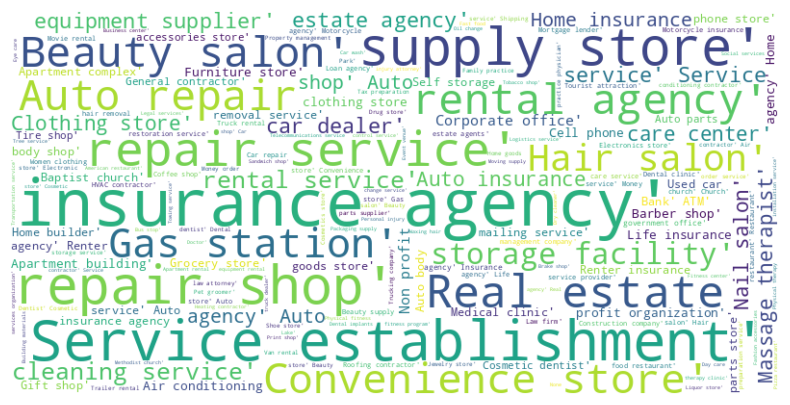

In [ ]:
# Crear nube de palabras para encontrar palabras representativas de cada categoria y en base a eso elegir las palabras  relacionadas con el rubro gastronomico

# Concatenar todos los textos en un solo string
texto_completo=' '.join(google_sitios['category'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Mostrar la nube de palabras usando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# OBSERVACIONES: No se encuentran a simple vistas palabras relacionadas al sector gastronomico

In [ ]:
google_sitios['category'].head(30)

0                                            'Pharmacy'
1                                    'Textile exporter'
2                                   'Korean restaurant'
3                                        'Fabric store'
4                                        'Fabric store'
5                                        'Fabric store'
6                                          'Restaurant'
7           'Nail salon', 'Waxing hair removal service'
8                    'Bakery', 'Health food restaurant'
9         'Greeting card shop', 'Service establishment'
10       'Dentist', 'Cosmetic dentist', 'Dental clinic'
11          'Auto glass shop', 'Window tinting service'
12                                       'Beauty salon'
13     'Ski rental service', 'Snowboard rental service'
14                                   'Corporate office'
15    'Massage spa', 'Chiropractor', 'Massage', 'Mas...
16                  'Paint store', 'Paint manufacturer'
17                                  'Massage the

In [ ]:
# Palabras realacionadas con el sector gastronomico generadas por chat gpt

# Prompt: "Chat generame palabras en inglés relacionadas con el sector gastronomico tales como restaurant, bar, coffee, puede utilizar dichas palabras. Genera un maximo de 500 palabras"

palabras_gastronomicas = [
    'restaurant', 'bar', 'coffee', 'cafe', 'cuisine', 'chef', 'menu', 'food', 'dish', 'drink',
    'cook', 'recipe', 'culinary', 'taste', 'flavor', 'dining', 'gourmet', 'bistro', 'pub',
    'brewery', 'grill', 'bakery', 'deli', 'sushi', 'pizzeria', 'fast food', 'snack', 'dessert',
    'beverage', 'wine', 'beer', 'cocktail', 'juice', 'spice', 'organic', 'farm-to-table',
    'locally sourced', 'fusion', 'vegetarian', 'vegan', 'gluten-free', 'buffet', 'catering',
    'patio', 'reservation', 'ambiance', 'culinary school', 'foodie', 'gastronomy', 'tasting',
    'savor', 'savory', 'aroma', 'pastry', 'garnish', 'fine dining', 'diner', 'serving',
    'seasoning', 'culinary arts', 'kitchen', 'tableware', 'buffet', 'grill', 'sauce', 'appetizer',
    'entree', 'dessert', 'culinary experience', 'bake', 'roast', 'spice', 'savor', 'tasting menu',
    'farm fresh', 'local produce', 'sustainable', 'dine-in', 'takeout', 'food truck', 'eatery',
    'culinary journey', 'gastropub', 'delicious', 'yummy', 'mouthwatering', 'craving', 'satisfying',
    'refreshing', 'hearty', 'flavorful', 'tasty', 'mouthful', 'epicurean', 'nosh', 'feast',
    'gourmand', 'tantalizing', 'palate', 'delectable', 'savory', 'zing', 'gastronome', 'delightful',
    'mouth-watering', 'gustatory', 'pungent', 'exquisite', 'cuisiner', 'piquant', 'zingy', 'mouthfeel',
    'spicy', 'appetizing', 'succulent', 'toothsome', 'flavor profile', 'umami', 'zest', 'tangy', 'crispy',
    'tender', 'juicy', 'rich', 'creamy', 'smoky', 'decadent', 'piping hot', 'artisanal', 'sizzling', 'zingy',
    'exotic', 'refreshing', 'sophisticated', 'culinary delight', 'flavor burst', 'hearty', 'mouth-coating',
    'indulgent', 'spicy kick', 'luscious', 'taste explosion', 'zesty', 'crunchy', 'fragrant', 'zippy',
    'sweet and savory', 'crave-worthy', 'gustatory pleasure', 'sumptuous', 'exquisite', 'picnic', 'seasonal',
    'farmers market', 'barbecue', 'picnic', 'al fresco', 'fusion cuisine', 'culinary magic', 'bountiful', 'grilled',
    'raw', 'authentic', 'freshly baked', 'culinary artistry', 'food pairing', 'mouth-filling', 'crafted', 'infused',
    'traditional', 'modern', 'homemade', 'classic', 'exotic', 'dolce', 'crust', 'infusion', 'artisan', 'artisanal',
    'decadence', 'fusion', 'gastronomic adventure', 'bake-off', 'culinary genius', 'tasty treat', 'culinary affair',
    'culinary craft', 'gastronomic journey', 'culinary connoisseur', 'culinary ecstasy', 'gastronomic pleasure',
    'mouthwatering sensation', 'tantalizing aroma', 'culinary exploration', 'gourmet delight', 'culinary delight',
    'gastronomic treat', 'flavor symphony', 'taste sensation', 'culinary creation', 'culinary exploration', 'food lover'
]


In [ ]:
# Filtrar las filas que contienen palabras clave gastronómicas
serie_gastronomica = google_sitios['category'][google_sitios['category'].str.contains('|'.join(palabras_gastronomicas), case=False, na=False)]
# Mostrar la serie resultante
serie_gastronomica
# OBSERVACION: Se encontraron 26524 registros que contienen datos referidos al sector gastronomico


2                                       'Korean restaurant'
6                                              'Restaurant'
8                        'Bakery', 'Health food restaurant'
32                                   'Beverage distributor'
36                                       'Delivery service'
                                ...                        
274959                                        'Barber shop'
274962    'Ramen restaurant', 'Japanese restaurant', 'Re...
274964                                   'Ramen restaurant'
274966                                               'Cafe'
274999    'Building materials store', 'Electrical supply...
Name: category, Length: 26524, dtype: object